<a href="https://colab.research.google.com/github/Thcataclismo/Data-sciense-/blob/main/Classifica%C3%A7%C3%A3o_de_renda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**O conjunto de dados que vou usar aqui são dados disponíveis publicamente, então não precisamos coletar e riscar os dados, apenas carregá-los na memória. Então, vamos começar a tarefa de classificação de renda com Python importando as bibliotecas Python necessárias e o conjunto de dados:**



https://www.kaggle.com/lodetomasi1995/income-classification/download


In [3]:
#importação de bibliotecas necessarias
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
#carregando dataframe
df = pd.read_csv('/content/drive/MyDrive/income_evaluation.csv')

In [6]:
df.isnull().any()

age                False
 workclass         False
 fnlwgt            False
 education         False
 education-num     False
 marital-status    False
 occupation        False
 relationship      False
 race              False
 sex               False
 capital-gain      False
 capital-loss      False
 hours-per-week    False
 native-country    False
 income            False
dtype: bool

In [7]:
df = df.rename(columns={'age': 'age',
                         ' workclass': 'workclass',
                         ' fnlwgt': 'final_weight',
                         ' education': 'education',
                         ' education-num': 'education_num',
                         ' marital-status': 'marital_status',
                         ' occupation': 'occupation',
                         ' relationship': 'relationship',
                         ' race': 'race',
                         ' sex': 'sex',
                         ' capital-gain': 'capital_gain',
                         ' capital-loss': 'capital_loss',
                         ' hours-per-week': 'hrs_per_week',
                         ' native-country': 'native_country',
                         ' income': 'income'
                        })

In [9]:
df['income'].unique()
df['income_encoded'] = [1 if value == ' >50K' else 0 for value in df['income'].values]
df['income_encoded'].unique()
# Let's check some descriptive statistics
df.describe()

,age,final_weight,education_num,capital_gain,capital_loss,hrs_per_week,income_encoded
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456,0.240810
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429,0.427581
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


*Observações das estatísticas acima:*

*No conjunto de dados, a média e a idade mediana são semelhantes, acho que será uma distribuição normal, verificaremos mais tarde usando visualizações.
As variáveis ​​de ganho e perda de capital são suspeitas. Todas as observações maiores que 0 estão no 4º quartil.
Nas colunas “hrs_per_week”, o mínimo é 1 e o máximo é 99, o que não é comum na vida real. Teremos que investigar isso mais tarde.
Apenas cerca de um quarto da população pode ganhar mais de 50.000 por ano*

**Classificação** **de Renda** 

Vamos ver como cada profissão se comporta comparando o número de pessoas que ganham mais de 50 mil. Veremos o número total de trabalhadores para cada área e o número total de pessoas que ganham mais de 50 mil em cada uma:

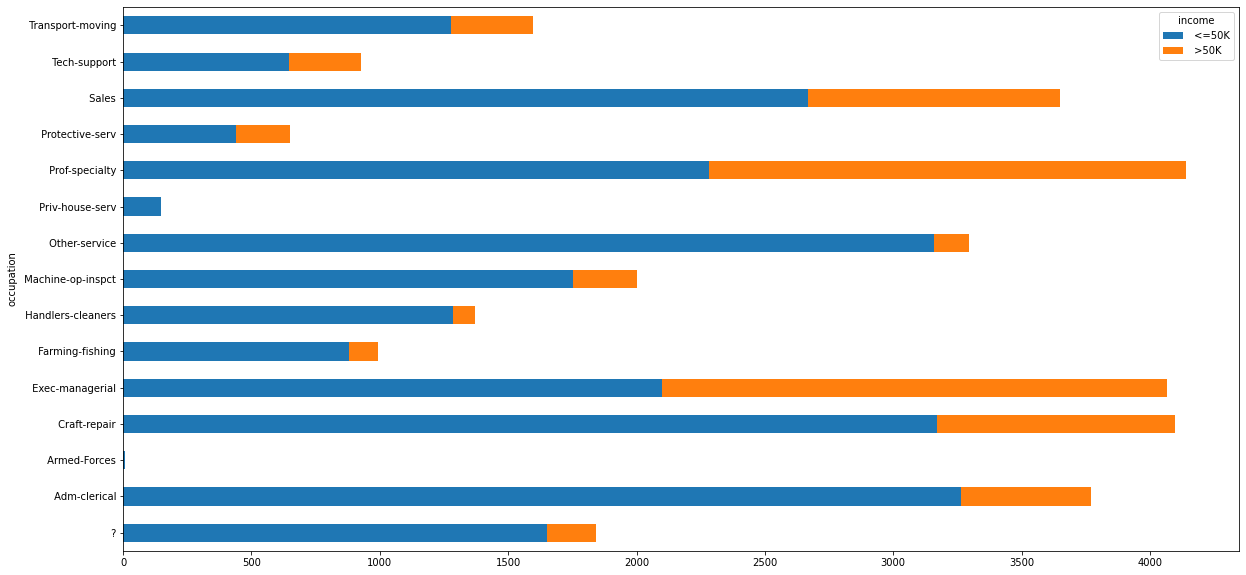

In [10]:

pd.crosstab(df["occupation"], df['income']).plot(kind='barh', stacked=True, figsize=(20, 10))

**Observações:**
As 3 ocupações principais em número total são a especialidade profissional, reparação doméstica, gestão executiva.
As 3 principais ocupações em termos de número total de pessoas que ganham mais de 50 mil (em ordem) são executiva, especialidades ocupacionais e vendas e reparos de artesanato (com uma margem próxima).
# Os executivos seniores têm a maior porcentagem de pessoas ganhando mais de 50.000 pessoas: 48%. 